In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_final.csv')

In [3]:
df.head()

,puisance de chauffe,puissance de prechauffage,Taux de reflux,Débit alimentation,Pertes de charges,Température de préchauffe,Température bouilleur,Température tête de colonne
0,100,2,8,2.17,0.9,85.3,107.8,101.6
1,0,4,10,2.17,2.6,84.5,107.8,101.5
2,73,5,4,2.17,1.1,83.9,107.8,101.6
3,70,7,12,2.17,2.2,83.2,107.9,101.5
4,32,9,7,2.17,1.4,82.7,107.9,101.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   puisance de chauffe          2401 non-null   int64  
 1   puissance de prechauffage    2401 non-null   int64  
 2   Taux de reflux               2401 non-null   int64  
 3   Débit alimentation           2401 non-null   float64
 4   Pertes de charges            2401 non-null   float64
 5   Température de préchauffe    2401 non-null   float64
 6   Température bouilleur        2401 non-null   float64
 7   Température tête de colonne  2401 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 150.2 KB


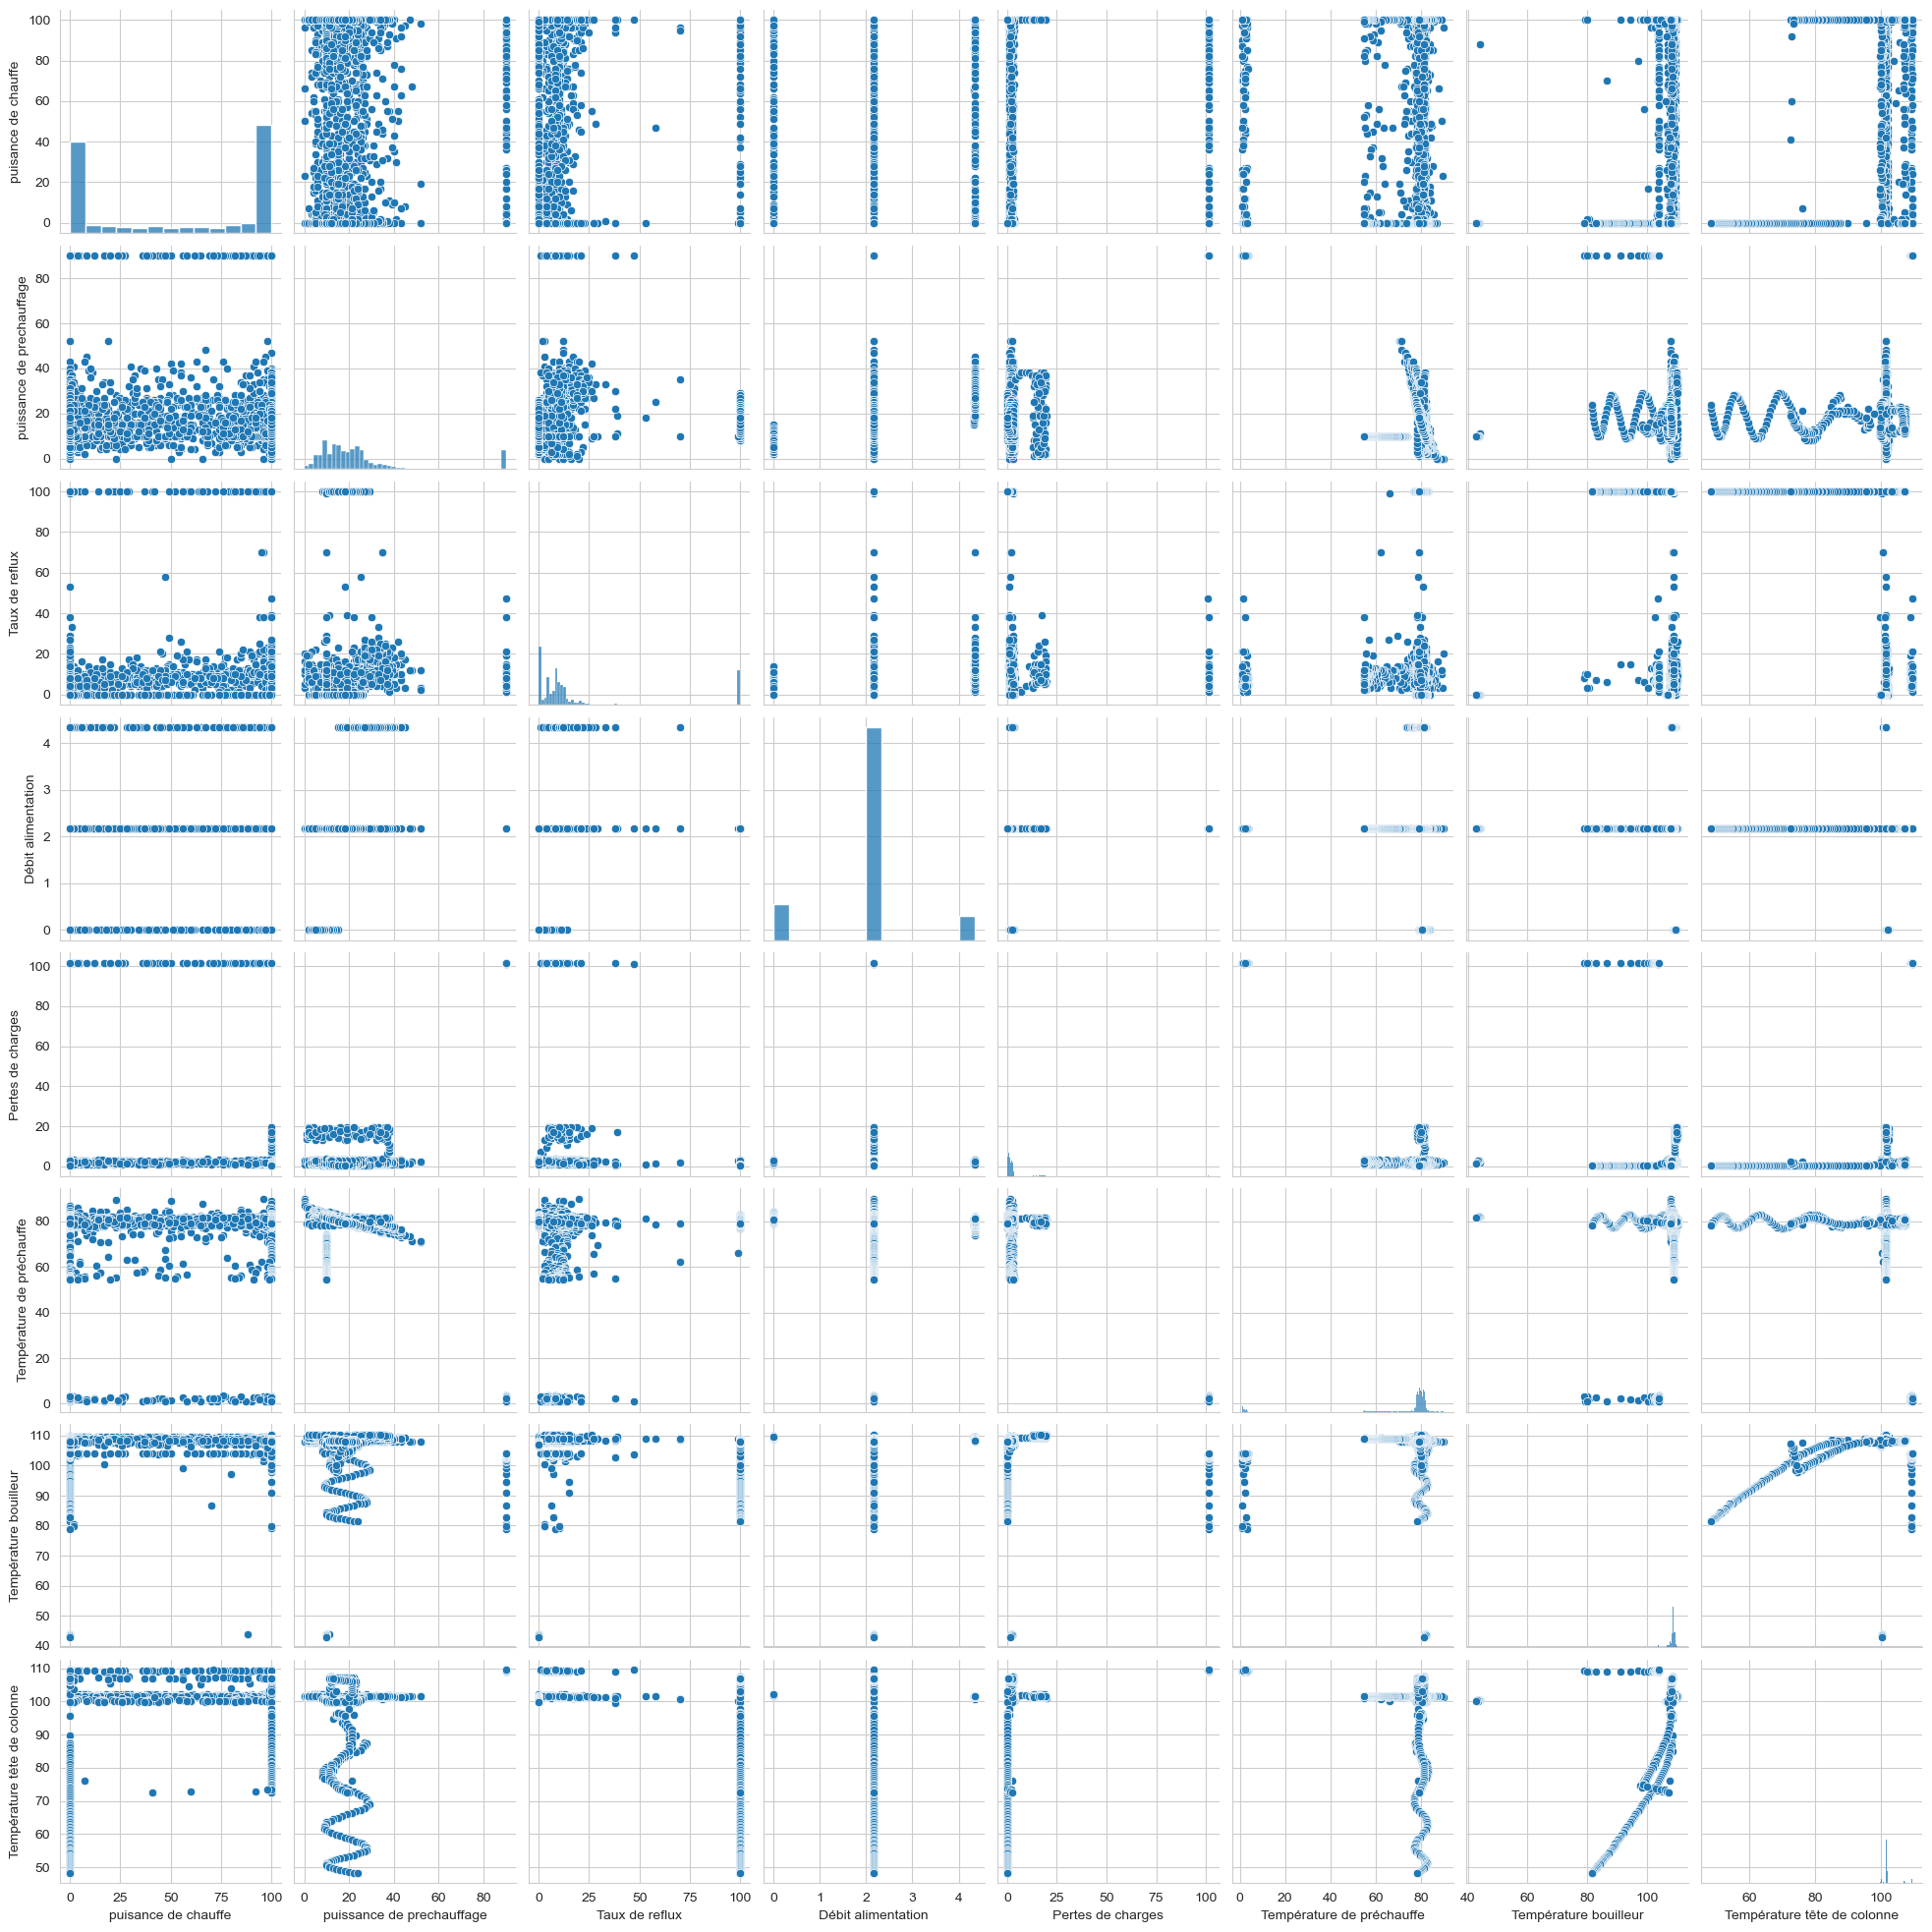

In [5]:
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

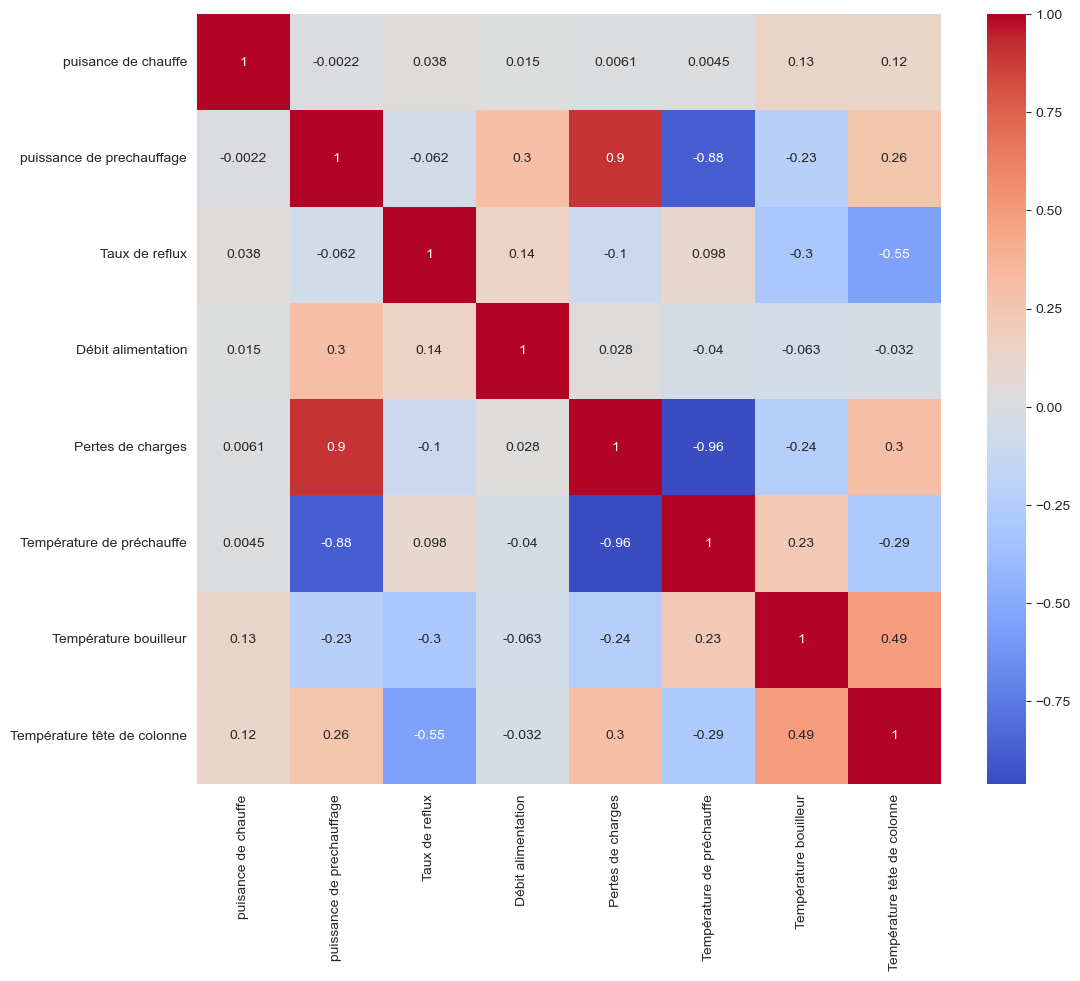

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)
plt.show()

In [19]:
TCOLONNE_class = np.where(df['Température tête de colonne']<=101.6,1,0)

In [20]:
TCOLONNE_class = np.where(df['Température tête de colonne']>=101.4,1,0)

In [23]:
df['Température tête de colonne'].value_counts()

101.5    805
101.6    379
101.4    153
101.9    106
102.1     67
        ... 
62.1       1
73.9       1
74.4       1
75.0       1
65.9       1
Name: Température tête de colonne, Length: 220, dtype: int64

In [24]:
df['TCOLONNE_class']=TCOLONNE_class

In [25]:
df.columns

Index(['puisance de chauffe', 'puissance de prechauffage', 'Taux de reflux',
       'Débit alimentation', 'Pertes de charges', 'Température de préchauffe',
       'Température bouilleur', 'Température tête de colonne',
       'TCOLONNE_class'],
      dtype='object')

In [26]:
df['TCOLONNE_class'].value_counts()

1    1943
0     458
Name: TCOLONNE_class, dtype: int64

In [29]:
df.drop('TCOLONNE_class', axis=1, inplace= True)

In [30]:
df.columns

Index(['puisance de chauffe', 'puissance de prechauffage', 'Taux de reflux',
       'Débit alimentation', 'Pertes de charges', 'Température de préchauffe',
       'Température bouilleur', 'Température tête de colonne'],
      dtype='object')

In [31]:
TCOLONNE_class = np.where(df['Température tête de colonne']==101.4,1,0)
TCOLONNE_class = np.where(df['Température tête de colonne']==101.5,1,0)
TCOLONNE_class = np.where(df['Température tête de colonne']==101.6,1,0)

In [32]:
df['TCOLONNE_class'] = TCOLONNE_class

In [33]:
df['TCOLONNE_class'].value_counts()

0    2022
1     379
Name: TCOLONNE_class, dtype: int64

In [34]:
df.drop('TCOLONNE_class',axis=1, inplace=True)

In [35]:
TCOLONNE_class_1 = np.where(df['Température tête de colonne']==101.4,1,0)
TCOLONNE_class_2 = np.where(df['Température tête de colonne']==101.5,1,0)
TCOLONNE_class_3 = np.where(df['Température tête de colonne']==101.6,1,0)

In [36]:
df['TCOLONNE_class'] = TCOLONNE_class_1 + TCOLONNE_class_2 + TCOLONNE_class_3

In [37]:
df['TCOLONNE_class'].value_counts()

1    1337
0    1064
Name: TCOLONNE_class, dtype: int64

In [38]:
df.columns

Index(['puisance de chauffe', 'puissance de prechauffage', 'Taux de reflux',
       'Débit alimentation', 'Pertes de charges', 'Température de préchauffe',
       'Température bouilleur', 'Température tête de colonne',
       'TCOLONNE_class'],
      dtype='object')

In [39]:
df_class = df.drop('Température tête de colonne', axis=1, inplace=False)

In [40]:
df_class.columns

Index(['puisance de chauffe', 'puissance de prechauffage', 'Taux de reflux',
       'Débit alimentation', 'Pertes de charges', 'Température de préchauffe',
       'Température bouilleur', 'TCOLONNE_class'],
      dtype='object')

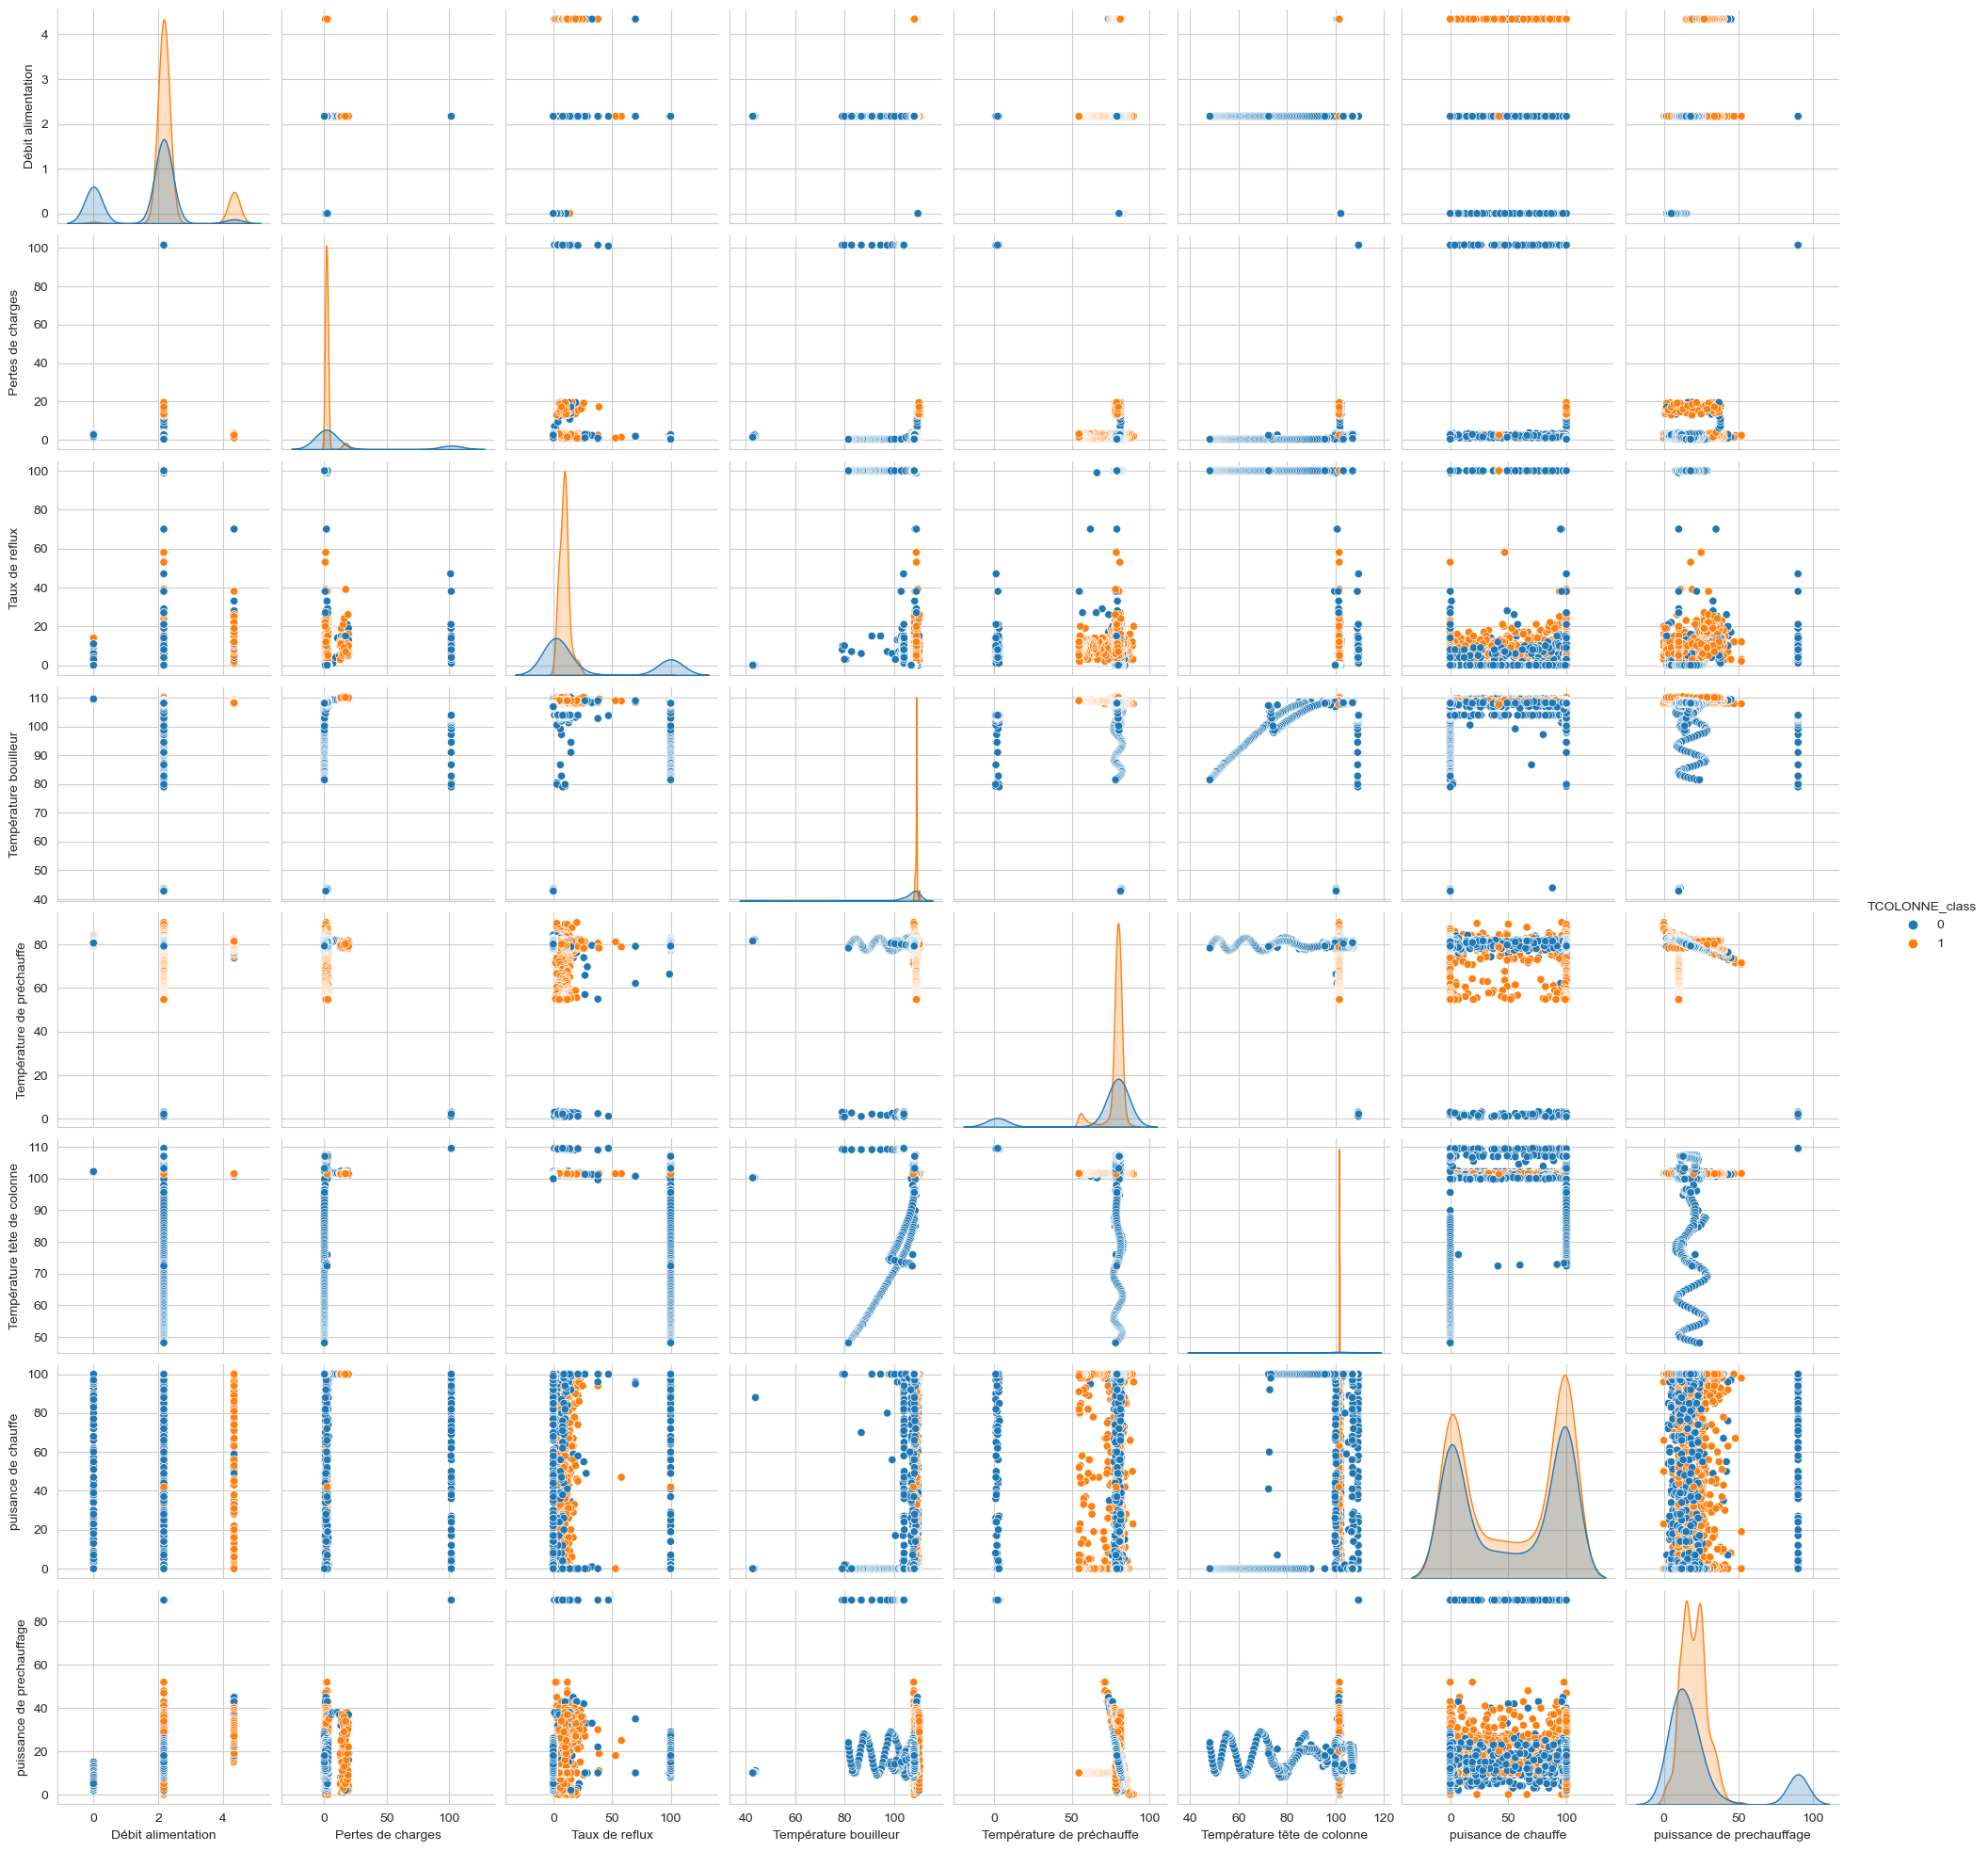

In [42]:
sns.set_style('whitegrid')
sns.pairplot(df[df.columns.difference(df['TCOLONNE_class'])], hue='TCOLONNE_class')
plt.show()

## Scaling

In [44]:
pd.crosstab(df['TCOLONNE_class'],df['TCOLONNE_class'], normalize='all')*100

TCOLONNE_class,0,1
TCOLONNE_class,,
0,44.314869,0.000000
1,0.000000,55.685131


In [46]:
df_class.shape

(2401, 8)

In [47]:
df_class.head()

,puisance de chauffe,puissance de prechauffage,Taux de reflux,Débit alimentation,Pertes de charges,Température de préchauffe,Température bouilleur,TCOLONNE_class
0,100,2,8,2.17,0.9,85.3,107.8,1
1,0,4,10,2.17,2.6,84.5,107.8,1
2,73,5,4,2.17,1.1,83.9,107.8,1
3,70,7,12,2.17,2.2,83.2,107.9,1
4,32,9,7,2.17,1.4,82.7,107.9,1


In [49]:
df_class.describe().T

,count,mean,std,min,25%,50%,75%,max
puisance de chauffe,2401.0,53.408580,44.293529,0.0,0.00,63.00,100.00,100.00
puissance de prechauffage,2401.0,22.470637,19.859110,0.0,11.00,18.00,25.00,90.00
Taux de reflux,2401.0,18.739275,31.108994,0.0,3.00,8.00,12.00,100.00
Débit alimentation,2401.0,2.069650,1.015699,0.0,2.17,2.17,2.17,4.34
Pertes de charges,2401.0,8.972970,24.910405,0.2,1.10,1.90,2.80,101.60
Température de préchauffe,2401.0,73.764598,19.810492,0.9,78.40,79.70,81.00,90.00
Température bouilleur,2401.0,107.517576,5.102800,42.8,108.00,108.90,109.00,110.40
TCOLONNE_class,2401.0,0.556851,0.496861,0.0,0.00,1.00,1.00,1.00


In [48]:
from sklearn.preprocessing import StandardScaler

In [54]:
df_class.shape

(2401, 7)

In [55]:
scale = StandardScaler()
df_sc = scale.fit_transform(df_class)

In [56]:
df_sc = pd.DataFrame(df_sc, columns = df_class.columns)
df_sc.head()

,puisance de chauffe,puissance de prechauffage,Taux de reflux,Débit alimentation,Pertes de charges,Température de préchauffe,Température bouilleur
0,1.052098,-1.031008,-0.345286,0.098819,-0.324148,0.582409,0.055358
1,-1.206039,-0.930278,-0.280983,0.098819,-0.255889,0.542018,0.055358
2,0.442401,-0.879912,-0.473893,0.098819,-0.316117,0.511724,0.055358
3,0.374657,-0.779182,-0.216679,0.098819,-0.271950,0.476382,0.074960
4,-0.483435,-0.678452,-0.377438,0.098819,-0.304072,0.451138,0.074960


In [57]:
df_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
puisance de chauffe,2401.0,1.026529e-17,1.000208,-1.206039,-1.206039,0.216587,1.052098,1.052098
puissance de prechauffage,2401.0,1.468352e-16,1.000208,-1.131738,-0.577721,-0.225165,0.127392,3.401131
Taux de reflux,2401.0,-1.517043e-15,1.000208,-0.602500,-0.506045,-0.345286,-0.216679,2.612674
Débit alimentation,2401.0,4.038026e-16,1.000208,-2.038086,0.098819,0.098819,0.098819,2.235725
Pertes de charges,2401.0,8.680178e-16,1.000208,-0.352254,-0.316117,-0.283996,-0.247858,3.719182
Température de préchauffe,2401.0,-2.915711e-15,1.000208,-3.678847,0.234036,0.299671,0.365307,0.819706
Température bouilleur,2401.0,-1.655058e-15,1.000208,-12.685400,0.094561,0.270971,0.290572,0.564989


In [58]:
df['TCOLONNE_class'].value_counts()

1    1337
0    1064
Name: TCOLONNE_class, dtype: int64

In [60]:
df_sc['TCOLONNE_class'] = df['TCOLONNE_class']

In [61]:
df_sc.head()

,puisance de chauffe,puissance de prechauffage,Taux de reflux,Débit alimentation,Pertes de charges,Température de préchauffe,Température bouilleur,TCOLONNE_class
0,1.052098,-1.031008,-0.345286,0.098819,-0.324148,0.582409,0.055358,1
1,-1.206039,-0.930278,-0.280983,0.098819,-0.255889,0.542018,0.055358,1
2,0.442401,-0.879912,-0.473893,0.098819,-0.316117,0.511724,0.055358,1
3,0.374657,-0.779182,-0.216679,0.098819,-0.271950,0.476382,0.074960,1
4,-0.483435,-0.678452,-0.377438,0.098819,-0.304072,0.451138,0.074960,1


In [62]:
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   puisance de chauffe        2401 non-null   float64
 1   puissance de prechauffage  2401 non-null   float64
 2   Taux de reflux             2401 non-null   float64
 3   Débit alimentation         2401 non-null   float64
 4   Pertes de charges          2401 non-null   float64
 5   Température de préchauffe  2401 non-null   float64
 6   Température bouilleur      2401 non-null   float64
 7   TCOLONNE_class             2401 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 140.8 KB


## Defning variables and spliting data

In [63]:
y = df_sc['TCOLONNE_class']
X = df_sc.drop('TCOLONNE_class', axis=1, inplace=False)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

## SVM Classification

In [65]:
from sklearn.svm import SVC

In [66]:
SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [67]:
# Predicting the Test set results
y_hat = SVM_classification.predict(X_test)

In [68]:
predictions = pd.DataFrame({'y_test':y_test, 'y_hat':y_hat})
predictions.tail(20)

,y_test,y_hat
2141,0,0
422,1,1
166,1,1
2362,0,0
1551,0,0
491,1,1
103,1,1
23,1,1
667,1,1
1919,0,0


In [69]:
predictions.head()

,y_test,y_hat
157,1,1
618,1,1
359,1,1
1183,0,0
1003,0,0


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, y_hat)

array([[203,  15],
       [  2, 261]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       218
           1       0.95      0.99      0.97       263

    accuracy                           0.96       481
   macro avg       0.97      0.96      0.96       481
weighted avg       0.97      0.96      0.96       481



In [73]:
from sklearn.model_selection import GridSearchCV
x = [0.1, 1.0,10.0,100.0,500.0,1000.0]
y = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,0.01,0.001]
z = [2,3,4]    
parameters=[{'C': x,'kernel': ['linear']},
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]

In [74]:
grid=GridSearchCV(estimator = SVM_classification,
                        param_grid = parameters,
                        cv=10,
                        n_jobs=-1,verbose=2)

In [76]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 294 candidates, totalling 2940 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1.0, 10.0, 100.0, 500.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [0.1, 1.0, 10.0, 100.0, 500.0, 1000.0],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1, 0.01, 0.001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1.0, 10.0, 100.0, 500.0, 1000.0],
                          'degree': [2, 3, 4],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                    1, 0.01, 0.001],
                          'kernel': ['poly']}],
             verbose=2)

In [77]:
print(grid.best_estimator_)

SVC(C=1000.0, gamma=0.9, kernel='poly')


In [78]:
classifier=SVC(kernel='poly', C=1000.0, gamma=0.9)

In [80]:
classifier.fit(X_train,y_train)

SVC(C=1000.0, gamma=0.9, kernel='poly')

In [81]:
y_pred=classifier.predict(X_test)

In [82]:
predictions_best = pd.DataFrame({'y_test':y_test, 'y_hat':y_pred})
predictions_best.tail(20)

,y_test,y_hat
2141,0,0
422,1,1
166,1,1
2362,0,0
1551,0,0
491,1,1
103,1,1
23,1,0
667,1,1
1919,0,0


In [83]:
predictions_best.head()

,y_test,y_hat
157,1,1
618,1,1
359,1,1
1183,0,0
1003,0,0


In [84]:
confusion_matrix(y_test,y_pred)

array([[211,   7],
       [  6, 257]], dtype=int64)

In [85]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       218
           1       0.95      0.99      0.97       263

    accuracy                           0.96       481
   macro avg       0.97      0.96      0.96       481
weighted avg       0.97      0.96      0.96       481



In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       218
           1       0.97      0.98      0.98       263

    accuracy                           0.97       481
   macro avg       0.97      0.97      0.97       481
weighted avg       0.97      0.97      0.97       481

